# Visualizing NN Training

In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import modeler
import dataset.iris_data

In [3]:
# Load iris dataset
train, test = iris_data.load_data()
num_train = train[0].shape[0]
train_x, train_y = train

In [4]:
# Define learning problem
iris = model.LearningProblem(input_dim=4, num_classes=3, train=train, test=test, path="./tmp/")

In [18]:
# Generate learning models            
#  [4 dim input] ==> [2 dim hidden] ==> [n dim hidden] ==> [3 dim output]
n_dim = [2,3,4,5,6,7,8,9,10,15]
for i in n_dim:
    iris.load_model("hidden_{}".format(i), hidden_dims=[2,i])

In [46]:
loss_curves = dict()
names = ['hidden_{}'.format(i) for i in n_dim]
with model.Session(iris) as sess:
    for m in names:
        sess.set_current_model(m)
        loss_curves[m] = sess.quick_train(epochs=10000)

Restoring variables for hidden_2.
INFO:tensorflow:Restoring parameters from ./tmp//hidden_2/model.ckpt
Restoring variables for hidden_3.
INFO:tensorflow:Restoring parameters from ./tmp//hidden_3/model.ckpt
Restoring variables for hidden_4.
INFO:tensorflow:Restoring parameters from ./tmp//hidden_4/model.ckpt
Restoring variables for hidden_5.
INFO:tensorflow:Restoring parameters from ./tmp//hidden_5/model.ckpt
Restoring variables for hidden_6.
INFO:tensorflow:Restoring parameters from ./tmp//hidden_6/model.ckpt
Restoring variables for hidden_7.
INFO:tensorflow:Restoring parameters from ./tmp//hidden_7/model.ckpt
Restoring variables for hidden_8.
INFO:tensorflow:Restoring parameters from ./tmp//hidden_8/model.ckpt
Restoring variables for hidden_9.
INFO:tensorflow:Restoring parameters from ./tmp//hidden_9/model.ckpt
Restoring variables for hidden_10.
INFO:tensorflow:Restoring parameters from ./tmp//hidden_10/model.ckpt
Restoring variables for hidden_15.
INFO:tensorflow:Restoring parameters

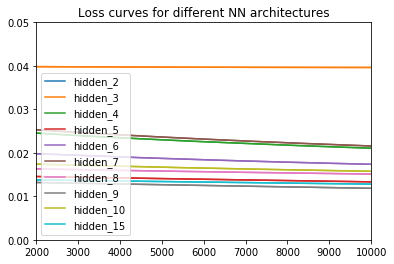

In [45]:
# Plot loss curves
for m in names:
    plt.plot(loss_curves[m])
plt.legend(names)
plt.xlim((2000,10000))
plt.ylim((0,0.05))
plt.title('Loss curves for different NN architectures')
plt.savefig('loss_curves.png')
plt.show()